In [4]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
rand = pd.read_excel('RandomizationFinal.xlsx')

In [6]:
rand = rand.dropna(subset=['Patient_id'])

In [7]:
rand = rand[rand['Intake'] < '2021-06-05']

In [8]:
rand = rand[rand['Finished study'] == 'Yes']

In [9]:
rand = rand[(rand['Group (final)'] != 0)]
rand = rand[(rand['Group (final)'] != 3)]

In [29]:
rand['Group (final)'].value_counts()

1.0    16
2.0    14
Name: Group (final), dtype: int64

In [10]:
results = pd.read_excel('final_result_study.xlsx')

In [11]:
results = results[results['Intake'] < '2021-06-05']

KeyError: 'Intake'

In [77]:
control = results[results['RP_AI_study_controle_groep_antwoord_optie'] == 'ja']
experimental = results[results['RP_AI_study_experimentele_groep_antwoord_optie'] == 'ja']

Check whether participants finished baseline

In [78]:
control['T0_MK_status'].value_counts()

Afgerond                 28
Gedeeltelijk ingevuld     1
Name: T0_MK_status, dtype: int64

In [79]:
experimental['T0_MK_status'].value_counts()

Afgerond                 29
Gedeeltelijk ingevuld     1
Gestart                   1
Name: T0_MK_status, dtype: int64

Remove those that were lost

In [80]:
control = control[control['T0_MK_status'] == 'Afgerond']
experimental = experimental[experimental['T0_MK_status'] == 'Afgerond']

Check whether participants finished T1

In [49]:
control['T1_MK_status'].value_counts()

Afgerond    22
Gestart      1
Name: T1_MK_status, dtype: int64

In [50]:
experimental['T1_MK_status'].value_counts()

Afgerond                 25
Gedeeltelijk ingevuld     1
Gestart                   1
Name: T1_MK_status, dtype: int64

Remove those that were lost

In [81]:
control = control[control['T1_MK_status'] == 'Afgerond']
experimental = experimental[experimental['T1_MK_status'] == 'Afgerond']

Check whether participants finished T2

In [52]:
control['T2_MK_status'].value_counts()

Afgerond                 18
Niet actief               1
Gestart                   1
Gedeeltelijk ingevuld     1
Uitgenodigd               1
Name: T2_MK_status, dtype: int64

In [53]:
experimental['T2_MK_status'].value_counts()

Afgerond                 23
Gedeeltelijk ingevuld     1
Gestart                   1
Name: T2_MK_status, dtype: int64

Remove those that were lost

In [82]:
control = control[control['T2_MK_status'] == 'Afgerond']
experimental = experimental[experimental['T2_MK_status'] == 'Afgerond']

Check whether participants finished T2 quality

In [56]:
control['AI_KC_status'].value_counts()

Afgerond    16
Gestart      2
Name: AI_KC_status, dtype: int64

In [57]:
experimental['AI_KC_status'].value_counts()

Afgerond    22
Gestart      1
Name: AI_KC_status, dtype: int64

Remove those that were lost

In [83]:
control = control[control['AI_KC_status'] == 'Afgerond']
experimental = experimental[experimental['AI_KC_status'] == 'Afgerond']

Remove participants that were excluded for other reasons

In [90]:
import numpy as np

to_remove = rand.dropna(subset=['Reason exclusion'])
to_remove = to_remove['Patient_id'].to_list()

In [92]:
control = control[~control['patientnummer'].isin(to_remove)]
experimental = experimental[~experimental['patientnummer'].isin(to_remove)]

In [97]:
complete = pd.concat([control, experimental])

In [100]:
control.head(1)

,patientnummer,email,intakedatum,zorgverleners,T1_MK_code,T1_MK_datum,T1_MK_status,T1_MK_ingevuld_in,datum,RP_datum,RP_ingevuld_in,T0_MK_datum,T0_MK_status,T0_MK_ingevuld_in,AI_KC_datum,AI_KC_status,AI_KC_ingevuld_in,T2_MK_datum,T2_MK_status,T2_MK_ingevuld_in,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_antwoord_optie,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_antwoord_optie,T1_MK_Gonartose_Conservatief_reden_geen_operatie_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_werking_NSAID_antwoord_optie,T1_MK_Gonartose_Conservatief_uitstellen_operatie_jong_antwoord_optie,T1_MK_Gonartose_Conservatief_gem_leeftijd_prothese_antwoord_optie,T1_MK_Gonartose_Conservatief_levensduur_knieprothese_antwoord_optie,T1_MK_Gonartose_Conservatief_voorstadium_artrose_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Gonartose_Conservatief_nut_kraakbeen_knie_antwoord_optie,T1_MK_Gonartose_Conservatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Conservatief_verloop_antwoord_optie,T1_MK_Gonartose_Conservatief_verwachting_antwoord_optie,T1_MK_Gonartose_Operatief_wat_is_knie_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_oorzaak_klachten_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_welke_behandeling_operatief_antwoord_optie,T1_MK_Gonartose_Operatief_gem_levensduur_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_geen_complicatie_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_doel_knieprothese_antwoord_optie,T1_MK_Gonartose_Operatief_bevestiging_prothese_in_bot_antwoord_optie,T1_MK_Gonartose_Operatief_dagen_ziekenhuisverblijf_antwoord_optie,T1_MK_Gonartose_Operatief_maanden_fysiotherapie_antwoord_optie,T1_MK_Gonartose_Operatief_duur_herstel_operatie_antwoord_optie,T1_MK_Gonartose_Operatief_uitspraken_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_gem_duur_pijn_antwoord_optie,T1_MK_Gonartose_Operatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Operatief_behandeling_antwoord_optie,T1_MK_Gonartose_Operatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Operatief_verloop_antwoord_optie,T1_MK_Gonartose_Operatief_verwachting_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_oorzaak_klachten_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_is_conservatieve_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_hoe_lang_paracetemol_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_reden_geen_operatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_werking_NSAID_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_reden_pijnstillers_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_advies_sport_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wanneer_operatie_verstandig_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_kijkoperatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_nut_kraakbeen_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verloop_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verwachting_antwoord_optie,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_vraagsscore,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_vraagsscore,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_vraagsscore,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_vraagsscore,T1_MK_Gonartose_Conservatief_reden_geen_operatie_vraagsscore,T1_MK_Gonartose_Conserva

In [99]:
complete.to_excel('results_complete.xlsx')
control.to_excel('results_control.xlsx')
experimental.to_excel('results_experimental.xlsx')

In [102]:
finish_dates = pd.read_excel('finish_dates.xlsx')
complete = complete.merge(finish_dates, on='patientnummer', how='left')

In [103]:
complete.head(1)

,patientnummer,email,intakedatum_x,zorgverleners,T1_MK_code,T1_MK_datum,T1_MK_status,T1_MK_ingevuld_in,datum,RP_datum,RP_ingevuld_in,T0_MK_datum,T0_MK_status,T0_MK_ingevuld_in,AI_KC_datum,AI_KC_status,AI_KC_ingevuld_in,T2_MK_datum,T2_MK_status,T2_MK_ingevuld_in,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_antwoord_optie,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_antwoord_optie,T1_MK_Gonartose_Conservatief_reden_geen_operatie_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_werking_NSAID_antwoord_optie,T1_MK_Gonartose_Conservatief_uitstellen_operatie_jong_antwoord_optie,T1_MK_Gonartose_Conservatief_gem_leeftijd_prothese_antwoord_optie,T1_MK_Gonartose_Conservatief_levensduur_knieprothese_antwoord_optie,T1_MK_Gonartose_Conservatief_voorstadium_artrose_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Gonartose_Conservatief_nut_kraakbeen_knie_antwoord_optie,T1_MK_Gonartose_Conservatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Conservatief_verloop_antwoord_optie,T1_MK_Gonartose_Conservatief_verwachting_antwoord_optie,T1_MK_Gonartose_Operatief_wat_is_knie_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_oorzaak_klachten_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_welke_behandeling_operatief_antwoord_optie,T1_MK_Gonartose_Operatief_gem_levensduur_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_geen_complicatie_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_doel_knieprothese_antwoord_optie,T1_MK_Gonartose_Operatief_bevestiging_prothese_in_bot_antwoord_optie,T1_MK_Gonartose_Operatief_dagen_ziekenhuisverblijf_antwoord_optie,T1_MK_Gonartose_Operatief_maanden_fysiotherapie_antwoord_optie,T1_MK_Gonartose_Operatief_duur_herstel_operatie_antwoord_optie,T1_MK_Gonartose_Operatief_uitspraken_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_gem_duur_pijn_antwoord_optie,T1_MK_Gonartose_Operatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Operatief_behandeling_antwoord_optie,T1_MK_Gonartose_Operatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Operatief_verloop_antwoord_optie,T1_MK_Gonartose_Operatief_verwachting_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_oorzaak_klachten_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_is_conservatieve_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_hoe_lang_paracetemol_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_reden_geen_operatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_werking_NSAID_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_reden_pijnstillers_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_advies_sport_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wanneer_operatie_verstandig_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_kijkoperatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_nut_kraakbeen_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verloop_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verwachting_antwoord_optie,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_vraagsscore,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_vraagsscore,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_vraagsscore,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_vraagsscore,T1_MK_Gonartose_Conservatief_reden_geen_operatie_vraagsscore,T1_MK_Gonartose_Conser

In [231]:
import sys
import math

def compute_scores(data):
    
    surveys = ['T0_MK', 'T1_MK', 'T2_MK', 'AI_KC']

    sr_knowledge = ['kennis_knie_en_herkomst_klachten', '_behandeling_', 'mogelijke_risico_complicatie', 
                'verloop', 'verwachting']
    
    sc_cols = ['consult_tijd-dokter', 'gondigheid_zorg', 'uitleg_medicatie_nazorg', 'advies_leefstij',
                   'uitleg_zorg', 'naar_verwachting_geholpen', 'zorg_op_poli', 'behulpzaamheid', 'Beleefdheid',
                   'Zorgzaamheid', 'Professionaliteit']
        
    cols = data.columns.to_list()
    
    for survey in surveys:
   
        if 'MK' in survey:
            rk_score_cols = [col for col in cols if survey in col]
            rk_score_cols = [col for col in rk_score_cols if 'vraagsscore' in col]
            rk_score_cols = [col for col in rk_score_cols if not any(var in col for var in sr_knowledge)]
            
            
            sk_score_cols = [col for col in cols if survey in col]
            sk_score_cols = [col for col in sk_score_cols if 'vraagsscore' in col]
            sk_score_cols = [col for col in sk_score_cols if any(var in col for var in sr_knowledge)]
            
            rk_scores = []
            sk_scores = []

            for index, participant in data.iterrows():
                _, rk_sum_score = compute_score(participant, rk_score_cols)
                _, sk_sum_score = compute_score(participant, sk_score_cols)
                rk_scores.append(rk_sum_score)
                sk_scores.append(sk_sum_score)
            
            print(rk_scores)
            data[f'{survey}_RK_Sum_Score'] = rk_scores
            data[f'{survey}_SK_Sum_Score'] = sk_scores 
                                
        else:

            sc_score_cols = [col for col in  cols if 'vraagsscore' in col]
            sc_score_cols = [col for col in  sc_score_cols if survey in col]
            sc_score_cols = [col for col in  sc_score_cols if any(var in col for var in sc_cols)]

            sc_scores = []
            sc_proportions_satisfactory_or_up = []
            sc_proportions_good_or_up = []
            sc_proportions_very_good_or_up = []
            
            for index, participant in data.iterrows():
                scores, sum_score = compute_score(participant, sc_score_cols)
                sc_scores.append(sum_score)
                sc_proportions_satisfactory_or_up.append(check_satisfaction(scores, 4))
                sc_proportions_good_or_up.append(check_satisfaction(scores, 3))
                sc_proportions_very_good_or_up.append(check_satisfaction(scores, 2))
                
            data['T2_SC_Sum_Score'] = sc_scores
            data['Satisfaction_satisfactory_or_up'] = sc_proportions_satisfactory_or_up
            data['Satisfaction_good_or_up'] = sc_proportions_good_or_up
            data['Satisfaction_very_good_or_up'] = sc_proportions_very_good_or_up
            
    return data

def compute_score(participant, score_cols):
    sum_score = 0
    scores = []
    score_cols = [col for col in score_cols if not math.isnan(participant[col])]
    for col in score_cols:
        score = participant[col]
        sum_score += score
        scores.append(score)

    return scores, sum_score

def check_satisfaction(scores, limit):
    if any(score > limit and score < 6 for score in scores):
        return "Not Satisfied"
    else:
        return "Satisfied"

In [232]:
fcomplete = compute_scores(complete)

[8.0, 7.0, 3.0, 5.0, 7.0, 6.0, 4.0, 6.0, 4.0, 5.0, 6.0, 9.0, 7.0, 7.0, 5.0, 4.0, 8.0, 7.0, 6.0, 8.0, 7.0, 4.0, 8.0, 4.0, 7.0, 7.0, 7.0, 7.0, 5.0]
[8.0, 9.0, 4.0, 3.0, 8.0, 7.0, 3.0, 6.0, 6.0, 0, 8.0, 8.0, 5.0, 8.0, 4.0, 5.0, 7.0, 8.0, 7.0, 9.0, 9.0, 7.0, 9.0, 6.0, 9.0, 10.0, 5.0, 9.0, 0]
[9.0, 8.0, 9.0, 7.0, 7.0, 7.0, 3.0, 6.0, 7.0, 6.0, 5.0, 7.0, 6.0, 10.0, 5.0, 5.0, 7.0, 8.0, 8.0, 9.0, 9.0, 6.0, 9.0, 6.0, 7.0, 8.0, 8.0, 8.0, 0]


In [236]:
fcomplete.to_excel('final_complete.xlsx')

In [237]:
control = fcomplete[fcomplete['RP_AI_study_controle_groep_antwoord_optie'] == 'ja']
experimental = fcomplete[fcomplete['RP_AI_study_experimentele_groep_antwoord_optie'] == 'ja']

In [2]:
control.to_excel('final_control.xlsx')
experimental.to_excel('final_experimental.xlsx')

NameError: name 'control' is not defined

In [225]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

def proportion_test(sample_size_control, sample_size_experimental, sample_succes_control, sample_succes_experimental):
    
    proportion_control = sample_succes_control / sample_size_control
    proportion_experimental = sample_succes_experimental / sample_size_experimental
    
    print(f'proportion control: {proportion_control}')
    print(f'proportion experimental: {proportion_experimental}')
    # can we assume anything from our sample
    significance = 0.05

    # check our sample against Ho for Ha != Ho
    successes = np.array([sample_succes_experimental, sample_succes_control])
    samples = np.array([sample_size_experimental, sample_size_control])
    # note, no need for a Ho value here - it's derived from the other parameters
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
    # report
    print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
    if p_value > significance:
           print ("Fail to reject the null hypothesis - we have nothing else to say")
    else:
           print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

In [218]:
sample_size_control = len(control)
sample_size_experimental = len(experimental)

In [217]:
sample_succes_control = control.loc[control['Satisfaction_good_or_up'] == 'Satisfied', 'Satisfaction_good_or_up'].count()
sample_succes_experimental = experimental.loc[experimental['Satisfaction_good_or_up'] == 'Satisfied', 'Satisfaction_good_or_up'].count()

In [226]:
proportion_test(sample_size_control, sample_size_experimental, sample_succes_control, sample_succes_experimental)

proportion control: 0.6875
proportion experimental: 0.6923076923076923
z_stat: 0.028, p_value: 0.489
Fail to reject the null hypothesis - we have nothing else to say


In [227]:
sample_succes_control = control.loc[control['Satisfaction_satisfactory_or_up'] == 'Satisfied', 'Satisfaction_satisfactory_or_up'].count()
sample_succes_experimental = experimental.loc[experimental['Satisfaction_satisfactory_or_up'] == 'Satisfied', 'Satisfaction_satisfactory_or_up'].count()

In [228]:
proportion_test(sample_size_control, sample_size_experimental, sample_succes_control, sample_succes_experimental)

proportion control: 0.875
proportion experimental: 1.0
z_stat: 1.321, p_value: 0.093
Fail to reject the null hypothesis - we have nothing else to say


In [234]:
sample_succes_control = control.loc[control['Satisfaction_very_good_or_up'] == 'Satisfied', 'Satisfaction_very_good_or_up'].count()
sample_succes_experimental = experimental.loc[experimental['Satisfaction_very_good_or_up'] == 'Satisfied', 'Satisfaction_very_good_or_up'].count()

In [235]:
proportion_test(sample_size_control, sample_size_experimental, sample_succes_control, sample_succes_experimental)

proportion control: 0.375
proportion experimental: 0.38461538461538464
z_stat: 0.053, p_value: 0.479
Fail to reject the null hypothesis - we have nothing else to say


In [104]:
complete = complete.reset_index()

In [149]:
### import plotly.figure_factory as ff
import datetime

def return_start_end(row, task, start_str, end_str, resource):
    
    start = row[start_str]
    end = row[end_str]
    
    start_date = start.strftime("%Y-%m-%d")
    
    if days_between(start, end) <= 1:
        end_date = end + datetime.timedelta(days=1)
        end_date = end_date.strftime("%Y-%m-%d")
        print(start_date, end_date)
    else:
        end_date = end.strftime("%Y-%m-%d")
        
    return dict(Task=task, Start=start, Finish=end_date, Resource=resource)

def days_between(d1, d2):
#     d1 = datetime.strptime(d1, "%Y-%m-%d")
#     d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

df = []


for index, row in complete.sort_values(by='intakedatum_x', ascending=True).reset_index().iterrows():
    task = index
    
    df.append(return_start_end(row, task, 'RP_datum', 'RP_afgerond_op', 'Randomization and Prediction'))
    df.append(return_start_end(row, task, 'T0_MK_datum', 'T0_MK_afgerond_op', 'Baseline Medical Knowledge'))
    df.append(return_start_end(row, task, 'T1_MK_datum', 'T1_MK_afgerond_op', 'T1 Medical Knowledge'))
    df.append(return_start_end(row, task, 'T2_MK_datum', 'T2_MK_afgerond_op', 'T2 Medical Knowledge + Satisfaction'))
#     df.append(return_start_end(row, task, 'AI_KC_datum', 'AI_KC_afgerond_op', 'Satisfaction and Experience'))
    df.append(return_start_end(row, task, 'intakedatum_x', 'intakedatum_x', 'Day of consultation'))
    
fig = ff.create_gantt(df, index_col='Resource', show_colorbar=True,
                      group_tasks=True, bar_width=0.3, width=1000)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Participant",
    legend=dict(
        x=.67,
        y=.97,
        traceorder="normal")
       
#     legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
    )

fig.write_html('gantt.html')
fig.write_image('gantt.png')

2021-04-06 2021-04-07
2021-04-06 2021-04-07
2021-04-10 2021-04-11
2021-04-13 2021-04-14
2021-04-12 2021-04-13
2021-04-07 2021-04-08
2021-04-07 2021-04-09
2021-04-10 2021-04-11
2021-04-13 2021-04-14
2021-04-12 2021-04-13
2021-04-09 2021-04-10
2021-04-09 2021-04-10
2021-04-13 2021-04-14
2021-04-16 2021-04-17
2021-04-15 2021-04-16
2021-04-09 2021-04-11
2021-04-10 2021-04-12
2021-04-13 2021-04-14
2021-04-16 2021-04-17
2021-04-15 2021-04-16
2021-04-07 2021-04-08
2021-04-07 2021-04-08
2021-04-13 2021-04-14
2021-04-16 2021-04-17
2021-04-15 2021-04-16
2021-04-13 2021-04-14
2021-04-13 2021-04-14
2021-04-17 2021-04-18
2021-04-20 2021-04-21
2021-04-19 2021-04-20
2021-04-13 2021-04-14
2021-04-13 2021-04-15
2021-04-17 2021-04-19
2021-04-20 2021-04-21
2021-04-19 2021-04-20
2021-04-15 2021-04-16
2021-04-15 2021-04-16
2021-04-19 2021-04-20
2021-04-22 2021-04-24
2021-04-21 2021-04-22
2021-05-01 2021-05-02
2021-05-01 2021-05-03
2021-05-05 2021-05-06
2021-05-08 2021-05-09
2021-05-07 2021-05-08
2021-04-29

In [242]:
control.head(1)

,index,patientnummer,email,intakedatum_x,zorgverleners,T1_MK_code,T1_MK_datum,T1_MK_status,T1_MK_ingevuld_in,datum,RP_datum,RP_ingevuld_in,T0_MK_datum,T0_MK_status,T0_MK_ingevuld_in,AI_KC_datum,AI_KC_status,AI_KC_ingevuld_in,T2_MK_datum,T2_MK_status,T2_MK_ingevuld_in,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_antwoord_optie,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_antwoord_optie,T1_MK_Gonartose_Conservatief_reden_geen_operatie_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_werking_NSAID_antwoord_optie,T1_MK_Gonartose_Conservatief_uitstellen_operatie_jong_antwoord_optie,T1_MK_Gonartose_Conservatief_gem_leeftijd_prothese_antwoord_optie,T1_MK_Gonartose_Conservatief_levensduur_knieprothese_antwoord_optie,T1_MK_Gonartose_Conservatief_voorstadium_artrose_antwoord_optie,T1_MK_Gonartose_Conservatief_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Gonartose_Conservatief_nut_kraakbeen_knie_antwoord_optie,T1_MK_Gonartose_Conservatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Conservatief_behandeling_antwoord_optie,T1_MK_Gonartose_Conservatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Conservatief_verloop_antwoord_optie,T1_MK_Gonartose_Conservatief_verwachting_antwoord_optie,T1_MK_Gonartose_Operatief_wat_is_knie_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_oorzaak_klachten_artrose_antwoord_optie,T1_MK_Gonartose_Operatief_welke_behandeling_operatief_antwoord_optie,T1_MK_Gonartose_Operatief_gem_levensduur_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_geen_complicatie_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_doel_knieprothese_antwoord_optie,T1_MK_Gonartose_Operatief_bevestiging_prothese_in_bot_antwoord_optie,T1_MK_Gonartose_Operatief_dagen_ziekenhuisverblijf_antwoord_optie,T1_MK_Gonartose_Operatief_maanden_fysiotherapie_antwoord_optie,T1_MK_Gonartose_Operatief_duur_herstel_operatie_antwoord_optie,T1_MK_Gonartose_Operatief_uitspraken_prothese_antwoord_optie,T1_MK_Gonartose_Operatief_gem_duur_pijn_antwoord_optie,T1_MK_Gonartose_Operatief_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Gonartose_Operatief_behandeling_antwoord_optie,T1_MK_Gonartose_Operatief_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Gonartose_Operatief_verloop_antwoord_optie,T1_MK_Gonartose_Operatief_verwachting_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_oorzaak_klachten_meniscusletsel_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_is_conservatieve_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_hoe_lang_paracetemol_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_reden_geen_operatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_werking_NSAID_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_reden_pijnstillers_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_advies_sport_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wanneer_operatie_verstandig_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_wat_is_kijkoperatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_geen_onderdeel_kniegewricht_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_nut_kraakbeen_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_kennis_knie_en_herkomst_klachten_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_behandeling_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_mogelijke_risico_complicatie_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verloop_antwoord_optie,T1_MK_Degeneratief_Meniscusletsel_verwachting_antwoord_optie,T1_MK_Gonartose_Conservatief_wat_is_knie_artrose_antwoord_vraagsscore,T1_MK_Gonartose_Conservatief_artrose_oorzaak_klachten_vraagsscore,T1_MK_Gonartose_Conservatief_geen_conservatieve_behandeling_vraagsscore,T1_MK_Gonartose_Conservatief_hoe_lang_paracetamol_vraagsscore,T1_MK_Gonartose_Conservatief_reden_geen_operatie_vraagsscore,T1_MK_Gonartose_

In [243]:
import scipy.stats as st

In [244]:
def compute_ci(data, mean):
    interval = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
    diff = mean - interval[0]
    return diff

Real knowledge bar chart

In [245]:
base_rk_control_mean = control['T0_MK_RK_Sum_Score'].mean()
base_rk_experimental_mean = experimental['T0_MK_RK_Sum_Score'].mean()

T1_rk_control_mean = control['T1_MK_RK_Sum_Score'].mean()
T1_rk_experimental_mean = experimental['T1_MK_RK_Sum_Score'].mean()

T2_rk_control_mean = control['T2_MK_RK_Sum_Score'].mean()
T2_rk_experimental_mean = experimental['T2_MK_RK_Sum_Score'].mean()

In [246]:
base_rk_control_error = compute_ci(control['T0_MK_RK_Sum_Score'], base_rk_control_mean)
base_rk_experimental_error = compute_ci(control['T0_MK_RK_Sum_Score'], base_rk_experimental_mean)

T1_rk_control_error = compute_ci(control['T1_MK_RK_Sum_Score'], T1_rk_control_mean)
T1_rk_experimental_error = compute_ci(control['T1_MK_RK_Sum_Score'], T1_rk_experimental_mean)

T2_rk_control_error = compute_ci(control['T2_MK_RK_Sum_Score'], T2_rk_control_mean)
T2_rk_experimental_error = compute_ci(control['T2_MK_RK_Sum_Score'], T2_rk_experimental_mean)

In [284]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    name='Control',
    x=['Baseline', '2 days before consultation', '1 day after consultation'], y=[base_rk_control_mean, T1_rk_control_mean, 
                                                                                 T2_rk_control_mean],
    error_y=dict(type='data', array=[base_rk_control_error, T1_rk_control_error, T2_rk_control_error]),
    text=[round(base_rk_control_mean, 2), round(T1_rk_control_mean, 2), round(T2_rk_control_mean, 2)],
    textposition="auto",
    insidetextanchor="middle",
    marker_color='#ec4646'
))

fig.add_trace(go.Bar(
    name='Experimental',
    x=['Baseline', '2 days before consultation', '1 day after consultation'], y=[base_rk_experimental_mean, 
                                                                            T1_rk_experimental_mean, T2_rk_experimental_mean],
    error_y=dict(type='data', array=[base_rk_experimental_error, T1_rk_experimental_error, T2_rk_experimental_error]),
    text=[round(base_rk_experimental_mean, 2), round(T1_rk_experimental_mean, 2), round(T2_rk_experimental_mean, 2)],
    textposition="auto",
    insidetextanchor="middle",
    marker_color='#51c2d5'
))

fig.update_layout(barmode='group')
fig.update_layout(
    yaxis_title="Level of real knowledge",
    legend=dict(
        x=.02,
        y=.97,
        traceorder="normal"),
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        paper_bgcolor = 'rgba(0, 0, 0, 0)')
fig.show()

In [262]:
base_sk_control_mean = control['T0_MK_SK_Sum_Score'].mean()
base_sk_experimental_mean = experimental['T0_MK_SK_Sum_Score'].mean()

T1_sk_control_mean = control['T1_MK_SK_Sum_Score'].mean()
T1_sk_experimental_mean = experimental['T1_MK_SK_Sum_Score'].mean()

T2_sk_control_mean = control['T2_MK_SK_Sum_Score'].mean()
T2_sk_experimental_mean = experimental['T2_MK_SK_Sum_Score'].mean()

In [263]:
base_sk_control_error = compute_ci(control['T0_MK_SK_Sum_Score'], base_sk_control_mean)
base_sk_experimental_error = compute_ci(control['T0_MK_SK_Sum_Score'], base_sk_experimental_mean)

T1_sk_control_error = compute_ci(control['T1_MK_SK_Sum_Score'], T1_sk_control_mean)
T1_sk_experimental_error = compute_ci(control['T1_MK_SK_Sum_Score'], T1_sk_experimental_mean)

T2_sk_control_error = compute_ci(control['T2_MK_SK_Sum_Score'], T2_sk_control_mean)
T2_sk_experimental_error = compute_ci(control['T2_MK_SK_Sum_Score'], T2_sk_experimental_mean)

In [283]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Control',
    x=['Baseline', '2 days before consultation', '1 day after consultation'], y=[base_sk_control_mean, T1_sk_control_mean, 
                                                                                 T2_sk_control_mean],
    error_y=dict(type='data', array=[base_sk_control_error, T1_sk_control_error, T2_sk_control_error]),
    text=[round(base_sk_control_mean, 2), round(T1_sk_control_mean, 2), round(T2_sk_control_mean, 2)],
    textposition="auto",
    insidetextanchor="middle",
    marker_color='#ec4646'
))

fig.add_trace(go.Bar(
    name='Experimental',
    x=['Baseline', '2 days before consultation', '1 day after consultation'], y=[base_sk_experimental_mean, 
                                                                            T1_sk_experimental_mean, T2_sk_experimental_mean],
    error_y=dict(type='data', array=[base_sk_experimental_error, T1_sk_experimental_error, T2_sk_experimental_error]),
    text=[round(base_sk_experimental_mean, 2), round(T1_sk_experimental_mean, 2), round(T2_sk_experimental_mean, 2)],
    textposition="auto",
    insidetextanchor="middle",
    marker_color='#51c2d5'
))

fig.update_layout(barmode='group')
fig.update_layout(
    yaxis_title="Level of perceived knowledge",
    legend=dict(
        x=.02,
        y=.97,
        traceorder="normal"),
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        paper_bgcolor = 'rgba(0, 0, 0, 0)')
fig.show()

In [14]:
pred = pd.read_excel('predict_analysis.xlsx').dropna(subset=['Geslacht'])

In [12]:
control = pd.read_excel('final_control.xlsx')
experimental = pd.read_excel('final_experimental.xlsx')

In [15]:
gender_control = control.merge(pred, on='patientnummer')

In [17]:
gender_control['Geslacht'].value_counts()

Female    8
Male      7
Name: Geslacht, dtype: int64

In [18]:
gender_experimental = experimental.merge(pred, on='patientnummer')

In [19]:
gender_experimental['Geslacht'].value_counts()

Male      8
Female    5
Name: Geslacht, dtype: int64

In [326]:
dia_to_rename = {'anders' : 'Other', 'gonartrose' : 'Gonarthrosis', 'meniscusletsel' : 'Meniscus'}
treat_to_rename = {'conservatief' : 'Conservative', 'operatief' : 'Surgical'}

y_dia_true = pred['Uitkomst_1e_consult_-_Heup_|_Knie_uitkomst_arts__K_diagnose__vraagsscore'].apply(str.strip).map(dia_to_rename).to_list()
y_treat_true = pred['Uitkomst_1e_consult_-_Heup_|_Knie_uitkomst_arts__K_behandeling__vraagsscore'].apply(str.strip).map(treat_to_rename).to_list()
y_dia_pred = pred['RP_AI_study_voorspelling_diagnose_antwoord_optie'].apply(str.strip).map(dia_to_rename).to_list()
y_treat_pred = pred['RP_AI_study_voorspelling_behandelingscategorie_antwoord_optie'].apply(str.strip).map(treat_to_rename).to_list()

In [350]:
from collections import Counter

def add_counts(lst):
    
    lst_counts = Counter(lst)
        
    for cls, count in lst_counts.items():
        lst = [f'{item} \n n={count}' if item == cls else item for item in lst]
        
    return lst

In [353]:
y_dia_true = add_counts(y_dia_true)
y_treat_true = add_counts(y_treat_true)
y_dia_pred = add_counts(y_dia_pred)
y_treat_pred = add_counts(y_treat_pred)

In [330]:
import scikitplot as skplt
import matplotlib.pyplot as plt

C:\Users\trist\anaconda3\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning:

invalid value encountered in true_divide



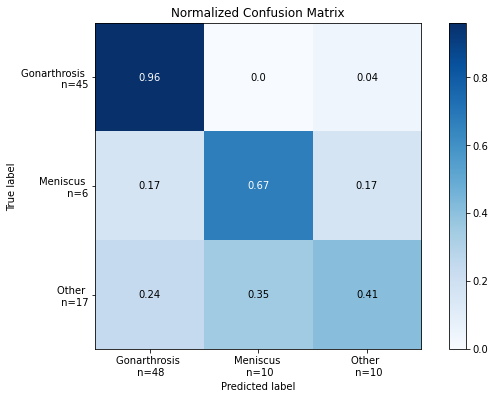

In [363]:
cm_diagnosis = skplt.metrics.plot_confusion_matrix(y_dia_true, y_dia_pred, true_labels=list(set(y_dia_true)),
                                                   pred_labels=list(set(y_dia_pred)), normalize=True, figsize=(10,6))
plt.savefig('cm_diagnosis_validation.png')

C:\Users\trist\anaconda3\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning:

invalid value encountered in true_divide



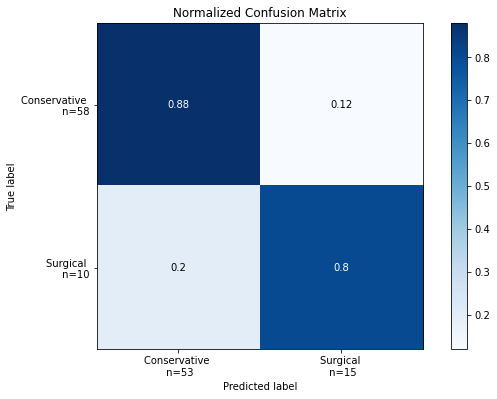

In [364]:
cm_treatment = skplt.metrics.plot_confusion_matrix(y_treat_true, y_treat_pred, true_labels=list(set(y_treat_true)),
                                                   pred_labels=list(set(y_treat_pred)), normalize=True, figsize=(10,6))
plt.savefig('cm_treatment_validation.png')

In [337]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

dia_ba = balanced_accuracy_score(y_dia_true, y_dia_pred)
treat_ba = balanced_accuracy_score(y_treat_true, y_treat_pred)

dia_recall = recall_score(y_dia_true, y_dia_pred, average='weighted')
treat_recall = recall_score(y_treat_true, y_treat_pred, average='weighted')

dia_precision = precision_score(y_dia_true, y_dia_pred, average='weighted')
treat_precision = precision_score(y_treat_true, y_treat_pred, average='weighted')

dia_f1 = f1_score(y_dia_true, y_dia_pred, average='weighted')
treat_f1 = f1_score(y_treat_true, y_treat_pred, average='weighted')

In [338]:
print(dia_ba, dia_recall, dia_precision, dia_f1)

0.677995642701525 0.7941176470588235 0.803125 0.7857017358914893


In [339]:
print(treat_ba, treat_recall, treat_precision, treat_f1)

0.8396551724137931 0.8676470588235294 0.8991860895301517 0.8779014308426072


In [50]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 2), round(m-h, 2), round(m+h, 2)

In [42]:
def reverseScoring(score, high=6):
    score = high - score
    return score

In [48]:
import sys
import math
import scipy.stats

def compute_scores(data):
    
    
    sc_score_cols = ['Wat vindt u van de hoeveelheid tijd die de dokter voor u had', 
                     'Wat vindt u van het resultaat van de medische zorg_bent u naar verwachting geholpen, gezien uw klachten',
                     'Hoe goed denkt u dat de medische zorg is op de polikliniek', 
                     'Wat vond u van de houding van de dokter naar u toe betreffende behulpzaamheid', 
                     'Wat vond u van de houding van de dokter naar u toe betreffende Zorgzaamheid',
                   ]
    
    cols = data.columns.to_list()

   
    sc_scores = []
    
    for column in sc_score_cols:
        data[column] = data[column].apply(reverseScoring)
        mean, lower_bound, upper_bound = mean_confidence_interval(data[column])
        print(f'{column}, mean {mean}, lower {lower_bound}, upper {upper_bound}')
        
       

In [55]:
ps = pd.read_excel('Kwaliteit consult.xlsx')

In [38]:
ps['Wat vindt u van de hoeveelheid tijd die de dokter voor u had'].head(5)

0    3
1    4
2    5
3    4
4    4
Name: Wat vindt u van de hoeveelheid tijd die de dokter voor u had, dtype: int64

In [53]:
ps = compute_scores(ps)

Wat vindt u van de hoeveelheid tijd die de dokter voor u had, mean 3.64, upper 3.45, lower 3.82
Wat vindt u van het resultaat van de medische zorg_bent u naar verwachting geholpen, gezien uw klachten, mean 2.88, upper 2.61, lower 3.15
Hoe goed denkt u dat de medische zorg is op de polikliniek, mean 3.65, upper 3.5, lower 3.8
Wat vond u van de houding van de dokter naar u toe betreffende behulpzaamheid, mean 3.92, upper 3.76, lower 4.09
Wat vond u van de houding van de dokter naar u toe betreffende Zorgzaamheid, mean 3.96, upper 3.79, lower 4.13


In [56]:
len(ps)

143

In [ ]:
sample_size_control = len(control)
sample_succes_control = control.loc[control['Satisfaction_good_or_up'] == 'Satisfied', 'Satisfaction_good_or_up'].count()